In [ ]:
#clean up, encoding
import pandas as pd
import numpy as np
import joblib

In [50]:
data = pd.read_csv('health_data.csv')

In [66]:
data.head()

,age,gender,height,weight,bmi,gad7_score,self_reported_stress,physical_activity_per_week,primary_goal,workout_goal_days,importance_stress_reduction,segment_label
0,56,0,1.77,63.2,20.2,15,6,0,0,1,1,0
1,46,1,1.68,100.8,35.7,2,9,5,1,1,2,3
2,32,1,1.61,64.0,24.7,21,10,0,2,4,5,0
3,60,1,1.90,104.2,28.9,8,4,0,2,7,3,5
4,25,0,1.67,94.0,33.7,14,7,7,3,3,4,3


In [54]:
data['segment_label'].unique()

array(['HighAnx_LowAct', 'PhysRisk', 'Inactive', 'LowAnx_HighAct',
       'Wellness seeker', 'ModAnx_ModAct'], dtype=object)

In [ ]:
#encoding the targets to specific values
data['segment_label'] = data['segment_label'].map(
    

)

data['gender'] = data['gender'].map(
    {'Male':0,
     'Female':1,
    }
)

In [60]:
data['primary_goal'].unique()

array(['imporve fitness', 'increase mindfulness', 'lose weight',
       'reduce stress'], dtype=object)

In [64]:
data['primary_goal'] = data['primary_goal'].map(
    {'imporve fitness':0,
     'increase mindfulness':1,
     'lose weight':2,
     'reduce stress':3
    }
)

In [79]:
#learning

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [83]:
#defining train-test split
X = data.drop(columns=['segment_label'])
y = data['segment_label']
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=42
)

In [87]:
clf = RandomForestClassifier(
    n_estimators = 100,
    max_depth = None,
    random_state = 42
)

In [89]:
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [93]:
y_pred = clf.predict(X_test)

In [95]:
print('Accuracy: ',accuracy_score(y_test,y_pred))

Accuracy:  0.885


In [97]:
print('Confusion Matrix: ',confusion_matrix(y_test,y_pred))

Confusion Matrix:  [[38  0  0  0  0  0]
 [ 0 17  0  6  0  0]
 [ 0  0  9  0  0  0]
 [ 0  0  0 55  1  0]
 [ 0  0  0  0 46  1]
 [ 0  0  0  0 15 12]]


In [99]:
print('Classification Report: ',classification_report(y_test,y_pred))

Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      0.74      0.85        23
           2       1.00      1.00      1.00         9
           3       0.90      0.98      0.94        56
           4       0.74      0.98      0.84        47
           5       0.92      0.44      0.60        27

    accuracy                           0.89       200
   macro avg       0.93      0.86      0.87       200
weighted avg       0.90      0.89      0.88       200



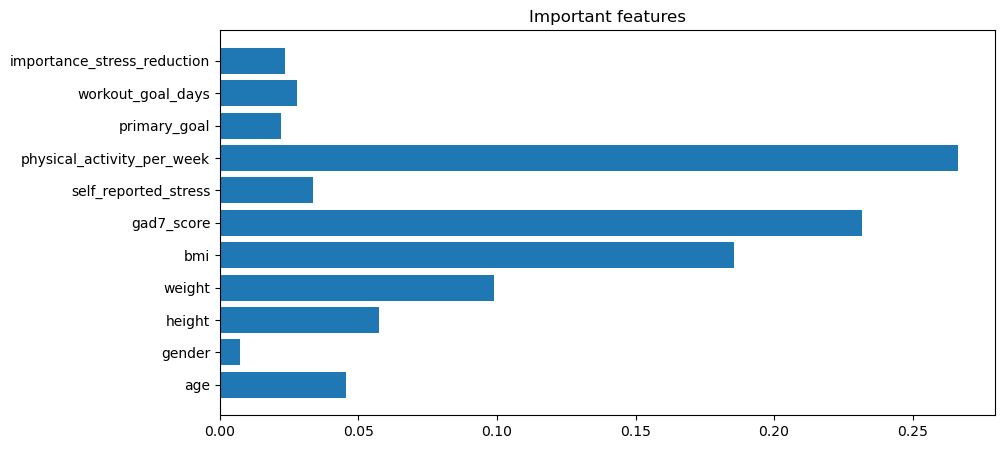

In [101]:
#determining feature importance
import matplotlib.pyplot as plt

importances = clf.feature_importances_
features = X.columns

plt.figure(figsize=(10,5))
plt.barh(features,importances)
plt.title('Important features')
plt.show()